# Loading and Understanding the Dataset

In [727]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

In [728]:
data = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [729]:
data.head(10)

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
5,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
6,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,30 Dakika
7,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
8,145136,60,Erkek,0 Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","POLEN,NOVALGIN",Parapleji ve tetrapleji,Parapleji,10 Seans,NaN,20 Dakika
9,145137,65,Kadın,0 Rh+,Türkiye,"Hiportiroidizm, Diyabet, Duchenne Musküler Dis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NOVALGIN,"Artroz, tanımlanmamış, el",El rehabilitasyonu,15 Seans,Sol El Bilek Bölgesi,15 Dakika


In [730]:
data.shape

(2235, 13)

In [731]:
data.describe()

,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


In [732]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


# Missing Value Analysis

In [733]:
# NaN oranlarını hesapla
nan_ratio = data.isna().mean() * 100   # yüzde cinsinden

# %60'tan fazla NaN olan sütunlar
high_nan_features = nan_ratio[nan_ratio > 60].index.tolist()

print("NaN oranları (%):")
print(nan_ratio.sort_values(ascending=False))

print("\n%60'tan fazla NaN içeren sütunlar:")
print(high_nan_features)


NaN oranları (%):
Alerji             42.237136
KanGrubu           30.201342
KronikHastalik     27.337808
UygulamaYerleri     9.888143
Cinsiyet            7.561521
Tanilar             3.355705
Bolum               0.492170
HastaNo             0.000000
Yas                 0.000000
Uyruk               0.000000
TedaviAdi           0.000000
TedaviSuresi        0.000000
UygulamaSuresi      0.000000
dtype: float64

%60'tan fazla NaN içeren sütunlar:
[]


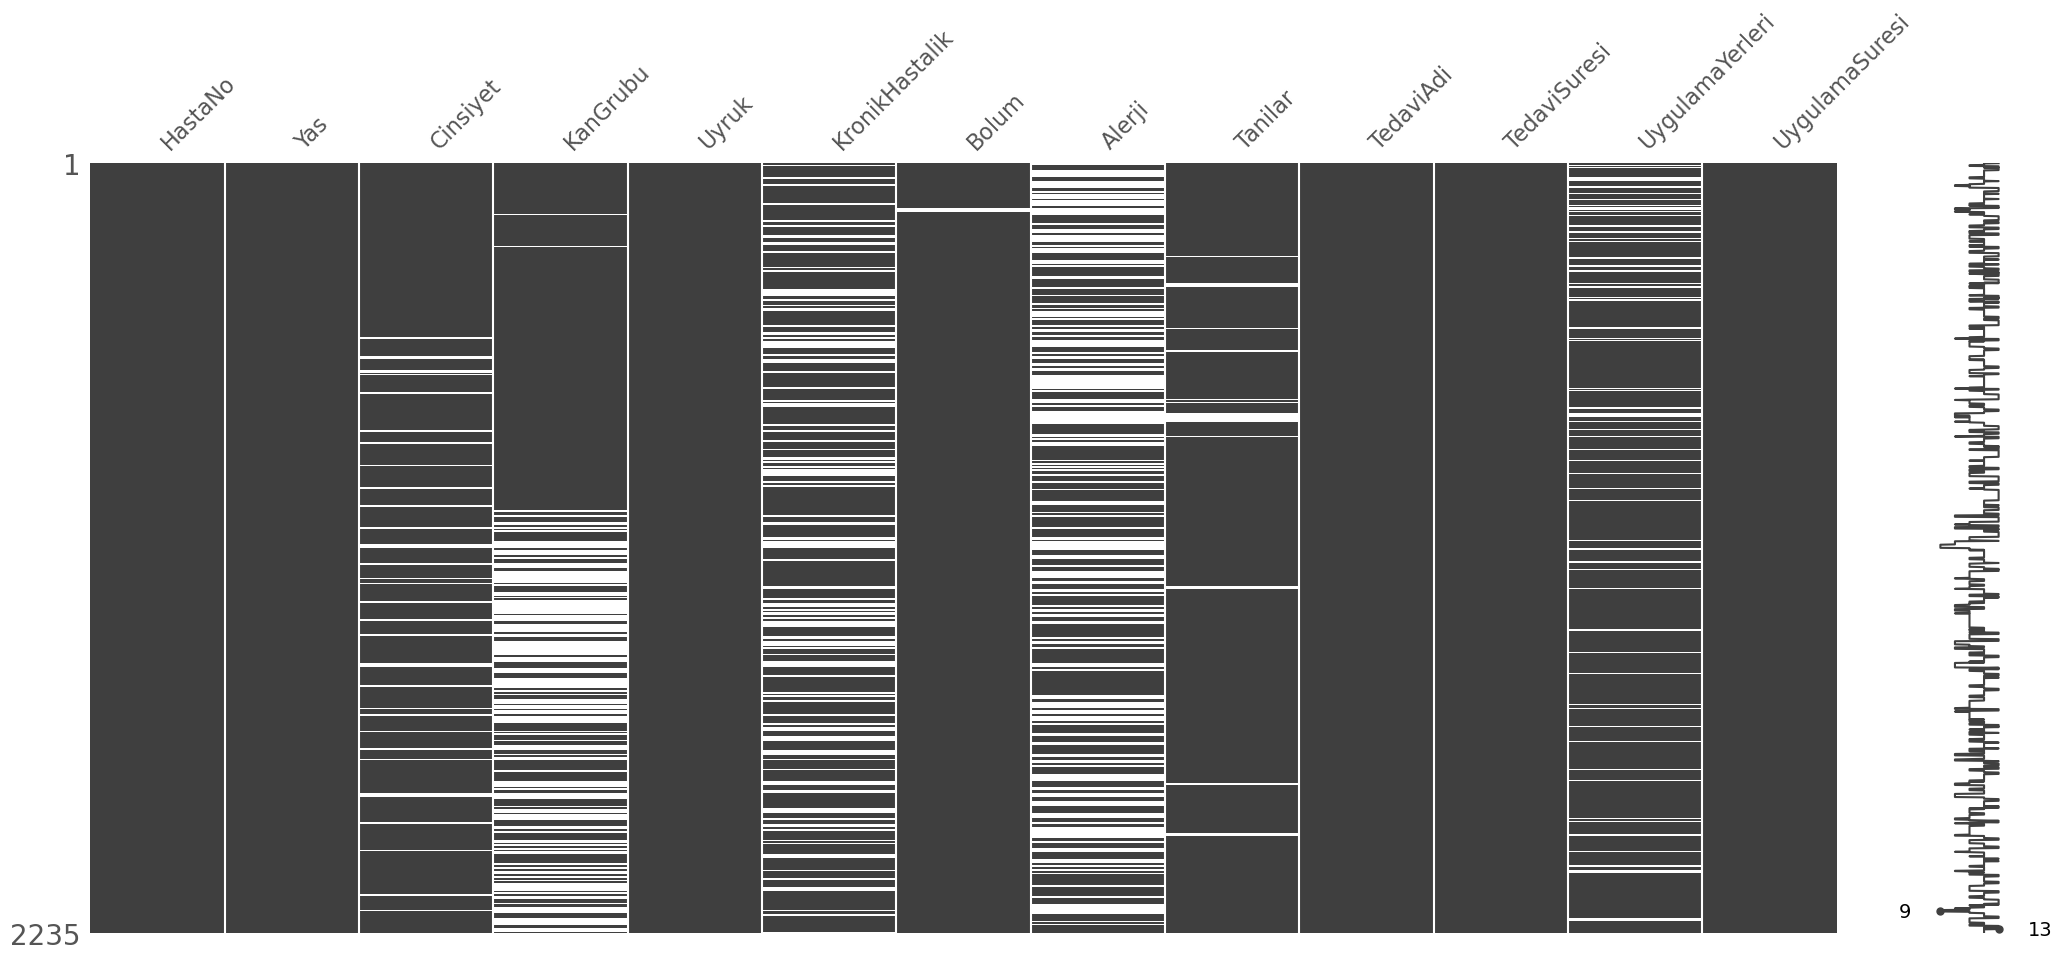

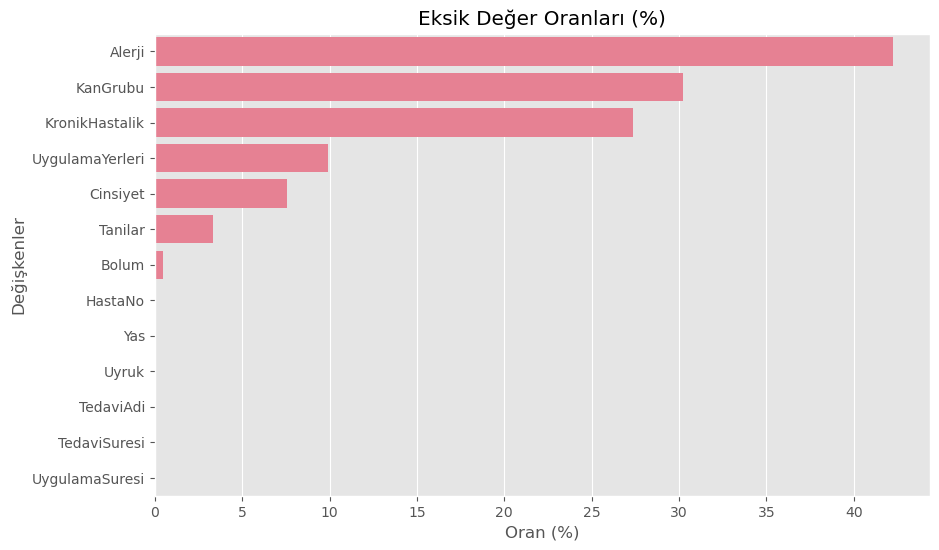

In [734]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Eksik değerlerin görselleştirilmesi
msno.matrix(data)
plt.show()

# NaN oranlarını barplot ile çiz
nan_ratio_sorted = nan_ratio.sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_ratio_sorted.values, y=nan_ratio_sorted.index)
plt.title("Eksik Değer Oranları (%)")
plt.xlabel("Oran (%)")
plt.ylabel("Değişkenler")
plt.show()


# Exploration of Numerical Features

In [813]:
print(data["Yas"].unique())
print("******************************")
print(data["Yas"].value_counts(dropna=False))
print("******************************")
data["Yas"].nunique(dropna=False)


[60 28 65 61 52 48 46 92 59 72 77 66 73 85 54 74 53 47 42 50 80 69 40 71
 68 62 33 45 38 43 57 51 44 36 20 39  2 49 79 75 56 34 15 63 24 41 55 70
 83 14 16 19 37 32 13 35 25 64 23 58 11 81 30 21 22 27 29 76 78 31 67  7
 26 87  6]
******************************
Yas
48    118
40     94
44     83
37     79
43     76
     ... 
13      3
83      3
87      3
76      2
6       1
Name: count, Length: 75, dtype: int64
******************************


75

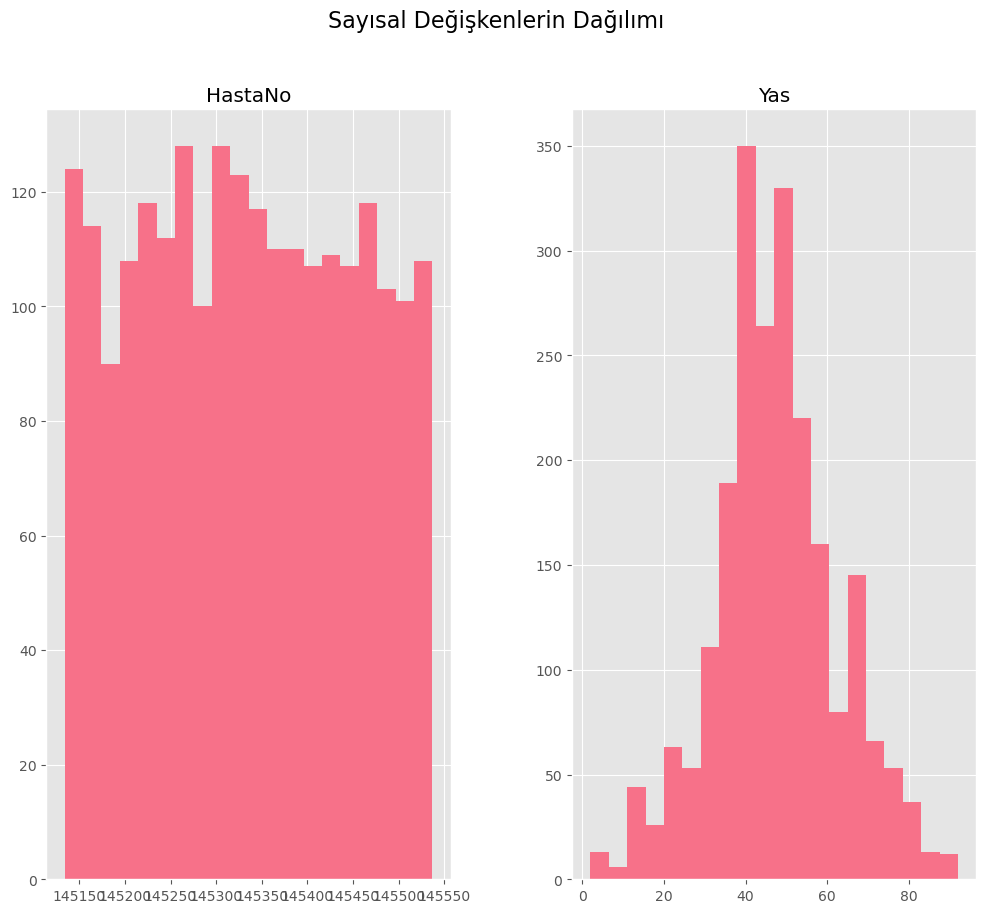

In [735]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
data[num_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=16)
plt.show()


In [736]:
data = data.drop('HastaNo', axis=1)

# Categorical Variable Handling

## Gender Encoding & Imputation

In [737]:
print(data["Cinsiyet"].unique())
print("******************************")
print(data["Cinsiyet"].value_counts(dropna=False))
print("******************************")
data["Cinsiyet"].nunique(dropna=False)


['Kadın' 'Erkek' nan]
******************************
Cinsiyet
Kadın    1274
Erkek     792
NaN       169
Name: count, dtype: int64
******************************


3

In [738]:
# Mapping
data['Cinsiyet_encoded'] = data['Cinsiyet'].map({'Kadın': 0, 'Erkek': 1})

# Kontrol (mapping sonrası eşleşmeyen değerler)
unmapped = data.loc[data['Cinsiyet_encoded'].isna(), 'Cinsiyet']
print("Mapping sonrası eşleşmeyen değerler:", unmapped.unique())

# Imputation (mode ile doldur)
majority_class = data['Cinsiyet_encoded'].mode(dropna=True)[0]
data['Cinsiyet'] = data['Cinsiyet_encoded'].fillna(majority_class).astype(int)

# Artık Cinsiyet temiz haliyle var 
# İstersen kontrol bittikten sonra drop et
data = data.drop(columns=['Cinsiyet_encoded'])


Mapping sonrası eşleşmeyen değerler: [nan]


In [739]:
# Mapping sonrası NaN olan değerleri kontrol et
unmapped = data.loc[data['Cinsiyet'].isna(), 'Cinsiyet']
if not unmapped.empty:
    print(" Mapping sonrası eşleşmeyen değerler:", unmapped.unique())
else:
    print("Mapping sonrası tüm değerler başarıyla eşleşti.")


Mapping sonrası tüm değerler başarıyla eşleşti.


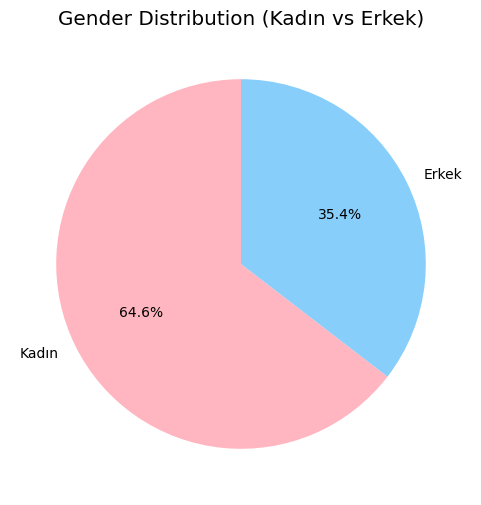

In [740]:
import matplotlib.pyplot as plt

# Cinsiyet dağılımı
gender_counts = data['Cinsiyet'].value_counts()

# Etiketler
labels = ['Kadın', 'Erkek']

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#FFB6C1","#87CEFA"])
plt.title("Gender Distribution (Kadın vs Erkek)")
plt.show()


## Blood Type One-Hot Encoding

In [741]:
print(data["KanGrubu"].unique())
print("******************************")
print(data["KanGrubu"].value_counts(dropna=False))
print("******************************")
data["KanGrubu"].nunique(dropna=False)


['0 Rh+' 'A Rh+' 'B Rh+' 'B Rh-' 'AB Rh+' nan 'A Rh-' '0 Rh-' 'AB Rh-']
******************************
KanGrubu
NaN       675
0 Rh+     579
A Rh+     540
B Rh+     206
AB Rh+     80
B Rh-      68
A Rh-      53
0 Rh-      26
AB Rh-      8
Name: count, dtype: int64
******************************


9

In [742]:
# Önce en sık görülen kan grubunu bulalım
most_frequent_kan_grubu = data['KanGrubu'].mode()[0]
print(f"En sık görülen kan grubu: {most_frequent_kan_grubu}")

# NaN değerleri en sık görülen kan grubuyla dolduralım
data['KanGrubu'] = data['KanGrubu'].fillna(most_frequent_kan_grubu)

# One-Hot Encoding uygulama
kan_grubu_encoded = pd.get_dummies(data['KanGrubu'], prefix='KanGrubu')

# Orijinal veri setine birleştirme
data = pd.concat([data, kan_grubu_encoded], axis=1)

# Orijinal sütunu silebilirsiniz
data = data.drop('KanGrubu', axis=1)

# Boolean sütunları int64'e dönüştürme
bool_columns = data.columns[data.dtypes == 'bool']
data[bool_columns] = data[bool_columns].astype('int64')

# Sonucu kontrol etme
print("\nOne-Hot Encoding sonrası sütunlar:")
print(kan_grubu_encoded.columns.tolist())
print(f"\nToplam sütun sayısı: {len(kan_grubu_encoded.columns)}")

En sık görülen kan grubu: 0 Rh+

One-Hot Encoding sonrası sütunlar:
['KanGrubu_0 Rh+', 'KanGrubu_0 Rh-', 'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+', 'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-']

Toplam sütun sayısı: 8


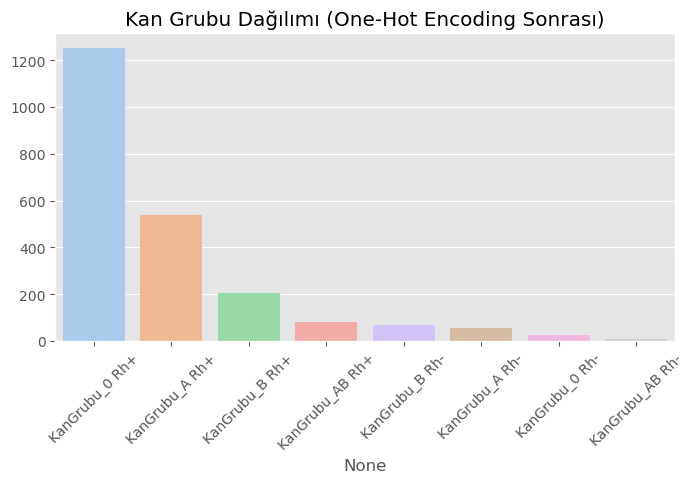

In [743]:
kan_columns = [col for col in data.columns if col.startswith("KanGrubu_")]

kan_counts = data[kan_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(x=kan_counts.index, y=kan_counts.values, palette="pastel")
plt.title("Kan Grubu Dağılımı (One-Hot Encoding Sonrası)")
plt.xticks(rotation=45)
plt.show()


## Nationality Encoding

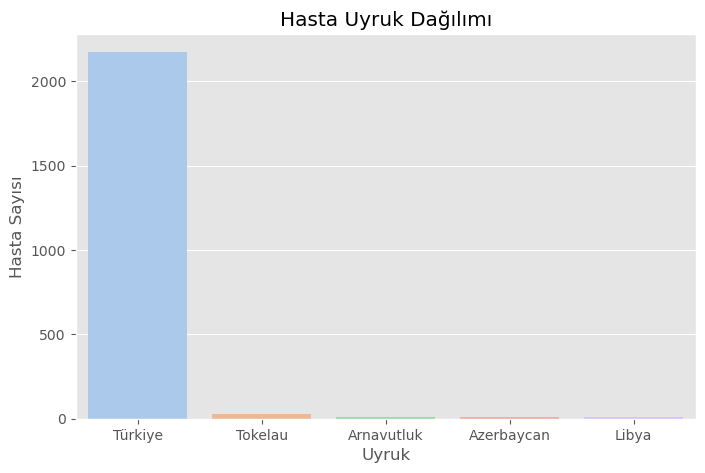

In [744]:
import matplotlib.pyplot as plt
import seaborn as sns

# Orijinal ülkeler ve sayıları
uyruk_counts = data['Uyruk'].replace({'Diğer': 'Diğer'}).value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=uyruk_counts.index, y=uyruk_counts.values, palette="pastel")
plt.title("Hasta Uyruk Dağılımı")
plt.xlabel("Uyruk")
plt.ylabel("Hasta Sayısı")
plt.show()


In [745]:
import pandas as pd

# Küçük kategorileri birleştirme (ör: 50'den az gözlem)
threshold = 50
uyruk_counts = data['Uyruk'].value_counts()
uyruk_filtered = uyruk_counts[uyruk_counts >= threshold].index.tolist()

# Küçükleri "Diğer" olarak değiştir
data['Uyruk_mod'] = data['Uyruk'].apply(lambda x: x if x in uyruk_filtered else 'Diğer')

# One-Hot Encoding
data = pd.get_dummies(data, columns=['Uyruk_mod'], prefix='Uyruk')
# Boolean → Integer
data['Uyruk_Diğer'] = data['Uyruk_Diğer'].astype(int)
data['Uyruk_Türkiye'] = data['Uyruk_Türkiye'].astype(int)

# Sonucu kontrol
print(data[['Uyruk_Diğer','Uyruk_Türkiye']].head())

data = data.drop(columns=['Uyruk'])

# Sonucu kontrol
print(data.filter(like='Uyruk_').head())


   Uyruk_Diğer  Uyruk_Türkiye
0            0              1
1            0              1
2            0              1
3            0              1
4            0              1
   Uyruk_Diğer  Uyruk_Türkiye
0            0              1
1            0              1
2            0              1
3            0              1
4            0              1


## Chronic Diseases Feature Engineering

In [746]:
print(data["KronikHastalik"].unique())
print("******************************")
print(data["KronikHastalik"].value_counts(dropna=False))
print("******************************")
data["KronikHastalik"].nunique(dropna=False)

['Becker Musküler Distrofisi, Hiportiroidizm, Kalp yetmezliği'
 'Duchenne Musküler Distrofisi, Myastenia gravis, Becker Musküler Distrofisi, Hipertansiyon'
 nan
 'Hiportiroidizm, Diyabet, Duchenne Musküler Distrofisi, Kalp yetmezliği'
 'Hiportiroidizm, Fascioscapulohumeral Distrofi, Duchenne Musküler Distrofisi, Diyabet'
 'Diyabet, Myastenia gravis, Aritmi' 'Diyabet' 'Kalp yetmezliği'
 'Limb-Girdle Musküler Distrofi, Duchenne Musküler Distrofisi, Becker Musküler Distrofisi'
 'Aritmi' 'Myastenia gravis, Diyabet' 'Kalp yetmezliği, Astım'
 'Kalp yetmezliği,Astım'
 'Duchenne Musküler Distrofisi, Fascioscapulohumeral Distrofi, Aritmi, Hiportiroidizm'
 'Hipertiroidizm, Hiportiroidizm, Myastenia gravis'
 'Hiportiroidizm, Hipertiroidizm, Limb-Girdle Musküler Distrofi'
 'Becker Musküler Distrofisi, Hiportiroidizm'
 'Diyabet, Hipertansiyon, Polimiyozit, Fascioscapulohumeral Distrofi'
 'Hipertansiyon' 'Limb-Girdle Musküler Distrofi'
 'Hiportiroidizm, Limb-Girdle Musküler Distrofi' 'Hipertiroidizm

221

In [747]:
# NaN değerleri "HastalıkYok" kategorisiyle doldur
data['KronikHastalik'] = data['KronikHastalik'].fillna('HastalıkYok')

In [748]:
# En sık görülen 10-15 hastalığı belirle
from collections import Counter
import itertools

all_diseases = []
for diseases in data['KronikHastalik']:
    if diseases != 'HastalıkYok':
        all_diseases.extend([d.strip() for d in diseases.split(',')])
        
disease_counts = Counter(all_diseases)
top_diseases = [disease for disease, count in disease_counts.most_common(15)]
print("En sık 15 hastalık:")
print(top_diseases)

En sık 15 hastalık:
['Aritmi', 'Hiportiroidizm', 'Limb-Girdle Musküler Distrofi', 'Astım', 'Hipertiroidizm', 'Myastenia gravis', 'Diyabet', 'Duchenne Musküler Distrofisi', 'Fascioscapulohumeral Distrofi', 'Kalp yetmezliği', 'Hipertansiyon', 'Polimiyozit', 'Becker Musküler Distrofisi', 'Guatr', 'Hipotirodizm']


In [749]:
# En sık 10 hastalık için binary encoding
for disease in top_diseases[:10]:
    data[f'Hastalik_{disease}'] = data['KronikHastalik'].str.contains(disease).astype(int)

# Orijinal sütunu sil
data = data.drop('KronikHastalik', axis=1)

In [750]:
# Yeni oluşan sütunları kontrol et
hastalik_columns = [col for col in data.columns if col.startswith('Hastalik_')]
print(f"Oluşturulan hastalık feature sayısı: {len(hastalik_columns)}")
print(data[hastalik_columns].sum().sort_values(ascending=False))

Oluşturulan hastalık feature sayısı: 10
Hastalik_Aritmi                           395
Hastalik_Hiportiroidizm                   383
Hastalik_Limb-Girdle Musküler Distrofi    379
Hastalik_Astım                            351
Hastalik_Hipertiroidizm                   327
Hastalik_Myastenia gravis                 316
Hastalik_Diyabet                          308
Hastalik_Duchenne Musküler Distrofisi     307
Hastalik_Fascioscapulohumeral Distrofi    304
Hastalik_Kalp yetmezliği                  301
dtype: int64


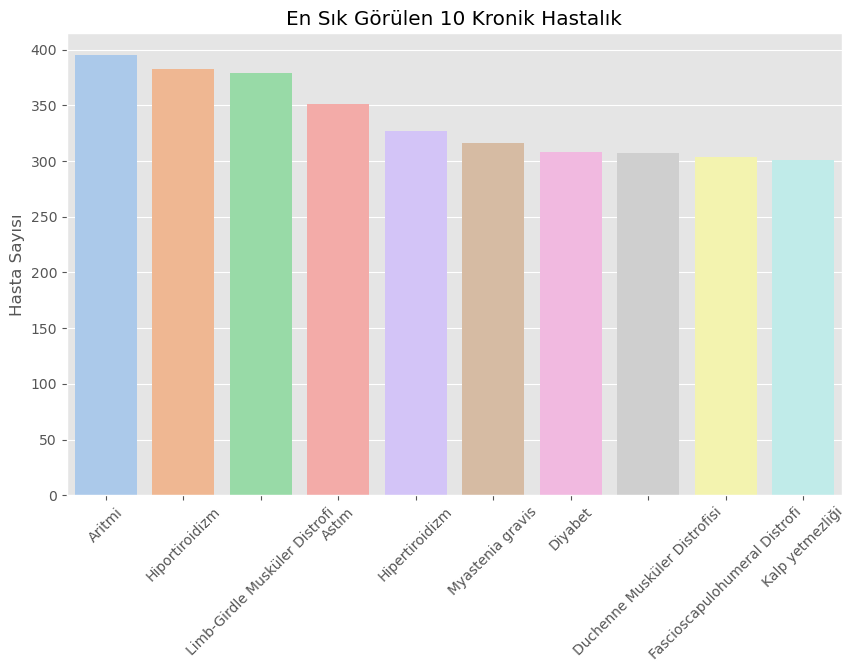

In [751]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_counts = {disease: disease_counts[disease] for disease in top_diseases[:10]}
plt.figure(figsize=(10,6))
sns.barplot(x=list(top_10_counts.keys()), y=list(top_10_counts.values()), palette='pastel')
plt.xticks(rotation=45)
plt.title("En Sık Görülen 10 Kronik Hastalık")
plt.ylabel("Hasta Sayısı")
plt.show()


## Department Feature

In [752]:
# Bolum'u binary feature olarak dönüştür
data['Bolum_FizikTedavi'] = (data['Bolum'] == 'Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi').astype(int)

# Orijinal sütunu sil
data = data.drop('Bolum', axis=1)

# Sonucu kontrol et
print(data['Bolum_FizikTedavi'].value_counts())


Bolum_FizikTedavi
1    2045
0     190
Name: count, dtype: int64


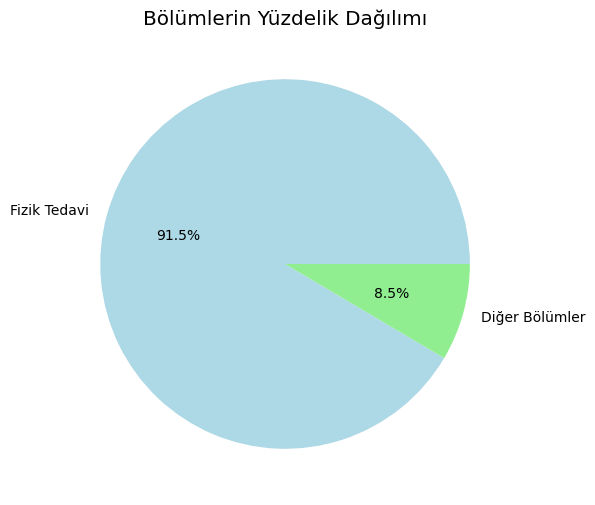

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

# Opsiyonel: Yüzdelik pasta grafiği
plt.figure(figsize=(6,6))
data['Bolum_FizikTedavi'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue','lightgreen'], labels=['Fizik Tedavi', 'Diğer Bölümler'])
plt.ylabel('')
plt.title('Bölümlerin Yüzdelik Dağılımı')
plt.show()


## Allergy Features

In [754]:
# NaN değerleri "AlerjiYok" ile doldur
data['Alerji'] = data['Alerji'].fillna('AlerjiYok')

# Tüm yazımları büyük harfe çevir ve boşlukları temizle
data['Alerji'] = data['Alerji'].str.upper().str.replace(' ', '')

# Yazım hatalarını düzelt
data['Alerji'] = data['Alerji'].str.replace('Nova1gin', 'NOVALGIN')
data['Alerji'] = data['Alerji'].str.replace('Volteren', 'VOLTAREN')
data['Alerji'] = data['Alerji'].str.replace('POLEM', 'Polen')
data['Alerji'] = data['Alerji'].str.replace('TOZ', 'Toz')
data['Alerji'] = data['Alerji'].str.replace('SUCUK', 'Sucuk')
data['Alerji'] = data['Alerji'].str.replace('GRIPIN', 'Gripin')

In [755]:
from collections import Counter

all_allergens = []
for allergens in data['Alerji']:
    if allergens != 'ALERJIYOK':
        all_allergens.extend(allergens.split(','))

allergen_counts = Counter(all_allergens)
allergen_df = pd.DataFrame.from_dict(allergen_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)
print(allergen_df)


            count
POLEN         500
Toz           259
NOVALGIN      182
Sucuk         174
ARVELES       102
CORASPIN      102
VOLTAREN       86
YERFISTIĞI     83
GRİPİN         55
VOLTEREN       35
Gripin         32


In [756]:
# En sık 8 alerjen
top_allergens = [allergen for allergen, count in allergen_counts.most_common(8)]
print("Top 8 alerjen:", top_allergens)

# Her ana alerjen için binary sütun oluştur
for allergen in top_allergens:
    data[f'Alerji_{allergen}'] = data['Alerji'].str.contains(allergen).astype(int)

# Nadir alerjenler için "Diğer_Alerjen"
data['Alerji_Diger'] = data['Alerji'].apply(
    lambda x: 0 if x == 'ALERJIYOK' else int(any(a not in top_allergens for a in x.split(',')))
)

# Toplam alerji sayısını güncelle
data['Toplam_Alerji_Sayisi'] = data['Alerji'].apply(
    lambda x: 0 if x == 'ALERJIYOK' else len(x.split(','))
)

# Orijinal sütunu sil
data = data.drop('Alerji', axis=1)


Top 8 alerjen: ['POLEN', 'Toz', 'NOVALGIN', 'Sucuk', 'ARVELES', 'CORASPIN', 'VOLTAREN', 'YERFISTIĞI']


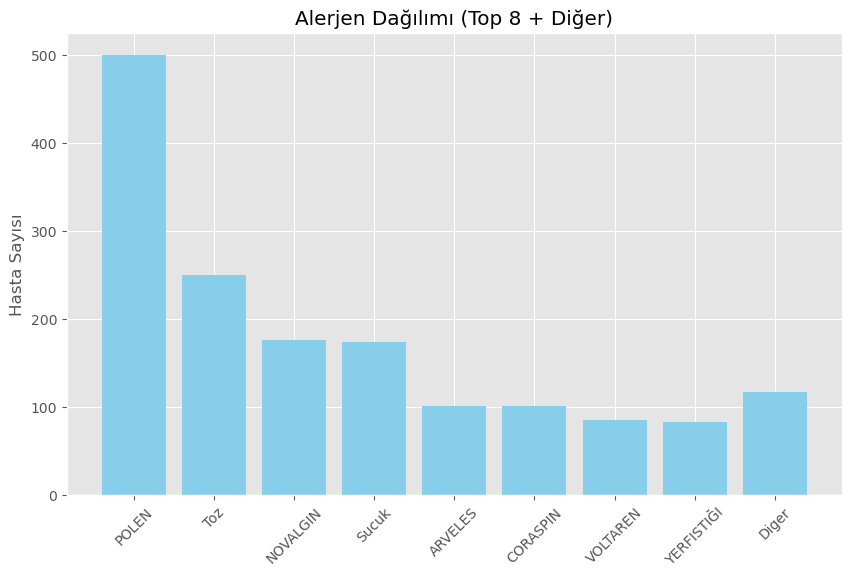

In [757]:
import matplotlib.pyplot as plt

# Toplam kişi sayısı her alerjen için
allergen_totals = {allergen: data[f'Alerji_{allergen}'].sum() for allergen in top_allergens + ['Diger']}
plt.figure(figsize=(10,6))
plt.bar(allergen_totals.keys(), allergen_totals.values(), color='skyblue')
plt.title("Alerjen Dağılımı (Top 8 + Diğer)")
plt.ylabel("Hasta Sayısı")
plt.xticks(rotation=45)
plt.show()


## Diagnosis Features

In [758]:
print(data["Tanilar"].unique())
print("******************************")
print(data["Tanilar"].value_counts(dropna=False))
print("******************************")
data["Tanilar"].nunique(dropna=False)

['Ayak bileği ve ayağın yüzeysel yaralanması'
 'Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE'
 'Parapleji ve tetrapleji' 'Artroz, tanımlanmamış, el'
 'Trokanterik bursit' 'Eklem ağrısı' 'Bisipital tendinit'
 'Bisipital tendinit,Omuzun darbe sendromu'
 'DORSALJİ, DİĞER, SERVİKOTORASİK BÖLGE'
 'Lenfödem, başka yerde sınıflanmamış,Ekstremite ağrısı'
 'Esansiyel (primer) hipertansiyon,Diyabetes mellitüs, diğer tanımlanmış,Kronik iskemik kalp hastalığı,Mitral kapak yetmezliği,Deliryum, demans üzerine eklenen,Parkinson hastalığı,Böbrek yetmezlikleri, tanımlanmamış,Konjestif kalp yetmezliği,Akut apandisit, peritoneal apse ile'
 'Esansiyel (primer) hipertansiyon\xa0,Diyabetes mellitüs, diğer tanımlanmış,Kronik iskemik kalp hastalığı,Mitral kapak yetmezliği,Deliryum, demans üzerine eklenen,Parkinson hastalığı,Böbrek yetmezlikleri, tanımlanmamış,Konjestif kalp yetmezliği,Akut apandisit, peritoneal apse ile'
 'Esansiyel (primer) hipertansiyon,Diyabetes mellitüs, tanımlanmamış, tanı

368

In [759]:
# NaN değerleri "TanıBilinmiyor" kategorisiyle doldur
data['Tanilar'] = data['Tanilar'].fillna('TanıBilinmiyor')

In [760]:
# Tüm tanıları basitleştir - sadece ana kategorileri al
import re

def extract_main_diagnosis(diagnosis):
    if diagnosis == 'TanıBilinmiyor':
        return 'TanıBilinmiyor'
    
    # Sadece ilk tanıyı veya ana kategorileri al
    main_diagnoses = []
    for diag in diagnosis.split(','):
        diag = diag.strip()
        # Basitleştirme
        if 'DORSALJİ' in diag:
            main_diagnoses.append('DORSALJI')
        elif 'intervertebral disk' in diag.lower():
            main_diagnoses.append('INTERVERTEBRAL_DISK')
        elif 'darbe sendromu' in diag.lower():
            main_diagnoses.append('DARBE_SENDROMU')
        elif 'artroz' in diag.lower() or 'artrozu' in diag.lower():
            main_diagnoses.append('ARTROZ')
        elif 'tendinit' in diag.lower() or 'tendon' in diag.lower():
            main_diagnoses.append('TENDINIT')
        elif 'menisküs' in diag.lower():
            main_diagnoses.append('MENISKUS')
        elif 'kırık' in diag.lower():
            main_diagnoses.append('KIRIK')
        elif 'hipertansiyon' in diag.lower():
            main_diagnoses.append('HIPERTANSIYON')
        elif 'diyabetes' in diag.lower():
            main_diagnoses.append('DIABETES')
        elif 'kalp' in diag.lower():
            main_diagnoses.append('KALP_HASTALIGI')
        else:
            # İlk 2 kelimeyi al
            words = diag.split()[:2]
            main_diagnoses.append('_'.join(words))
    
    return ','.join(main_diagnoses)

data['Ana_Tanilar'] = data['Tanilar'].apply(extract_main_diagnosis)

In [761]:
# Ana tanıları say
from collections import Counter
all_main_diagnoses = []
for diagnoses in data['Ana_Tanilar']:
    if diagnoses != 'TanıBilinmiyor':
        for diag in diagnoses.split(','):
            all_main_diagnoses.append(diag.strip())

diagnosis_counts = Counter(all_main_diagnoses)
top_diagnoses = [diag for diag, count in diagnosis_counts.most_common(15)]
print("En sık 15 ana tanı:")
print(top_diagnoses)

En sık 15 ana tanı:
['DORSALJI', 'DİĞER', 'tanımlanmamış', 'DARBE_SENDROMU', 'İntervertebral_disk', 'LUMBOSAKRAL_BÖLGE', 'SERVİKOTORASİK_BÖLGE', 'SERVİKAL_BÖLGE', 'TENDINIT', 'ARTROZ', 'Eklem_ağrısı', 'Dorsalji', 'diğer', 'MENISKUS', 'Fibromiyalji']


In [762]:
# En sık 10-12 ana tanı için binary encoding
for diagnosis in top_diagnoses[:12]:
    data[f'Tani_{diagnosis}'] = data['Ana_Tanilar'].str.contains(diagnosis).astype(int)

# Toplam tanı sayısı
data['Toplam_Tani_Sayisi'] = data['Ana_Tanilar'].apply(
    lambda x: 0 if x == 'TanıBilinmiyor' else len(x.split(','))
)

# Vücut bölgesi feature'ları
body_parts = ['Omuz', 'Bel', 'Boyun', 'Diz', 'Kalça', 'Ayak', 'El']
for part in body_parts:
    data[f'Vucut_Bolgesi_{part}'] = data['Tanilar'].str.contains(part).astype(int)

In [763]:
# Tanı grupları oluştur
diagnosis_groups = {
    'KAS_ISKELET': ['DORSALJI', 'INTERVERTEBRAL_DISK', 'DARBE_SENDROMU', 'ARTROZ', 'TENDINIT'],
    'KARDIOVASKULER': ['HIPERTANSIYON', 'KALP_HASTALIGI'],
    'METABOLIK': ['DIABETES'],
    'TRAVMA': ['KIRIK', 'MENISKUS']
}

for group, diagnoses in diagnosis_groups.items():
    data[f'Tani_Grup_{group}'] = data[[f'Tani_{d}' for d in diagnoses if f'Tani_{d}' in data.columns]].any(axis=1).astype(int)

In [764]:
# Orijinal sütunları sil
data = data.drop(['Tanilar', 'Ana_Tanilar'], axis=1)

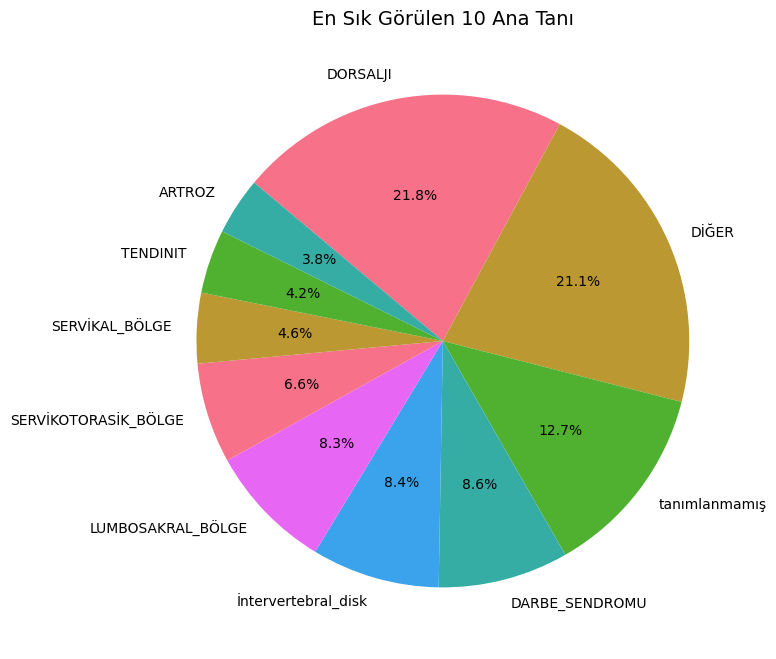

In [765]:
import matplotlib.pyplot as plt

# En sık 10 tanıyı al
top_counts = diagnosis_counts.most_common(10)
labels, values = zip(*top_counts)

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, counterclock=False)
plt.title("En Sık Görülen 10 Ana Tanı", fontsize=14)
plt.show()


In [766]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Yas                                     2235 non-null   int64 
 1   Cinsiyet                                2235 non-null   int32 
 2   TedaviAdi                               2235 non-null   object
 3   TedaviSuresi                            2235 non-null   object
 4   UygulamaYerleri                         2014 non-null   object
 5   UygulamaSuresi                          2235 non-null   object
 6   KanGrubu_0 Rh+                          2235 non-null   int64 
 7   KanGrubu_0 Rh-                          2235 non-null   int64 
 8   KanGrubu_A Rh+                          2235 non-null   int64 
 9   KanGrubu_A Rh-                          2235 non-null   int64 
 10  KanGrubu_AB Rh+                         2235 non-null   int64 
 11  KanG

## Treatment Name Processing

In [767]:
# Temel temizlik
data['TedaviAdi'] = data['TedaviAdi'].str.strip().str.lower()
data['TedaviAdi'] = data['TedaviAdi'].str.replace(r'\s+', ' ', regex=True)


In [768]:
replace_dict = {
    'impingement': 'impingement',
    'el rehabilitasyonu-el rehabilitasyonu': 'el rehabilitasyonu',
    'dorsalji 1': 'dorsalji',
    'sol omuz impingement': 'sol omuz impingement',
    'sağ omuz impingement': 'sağ omuz impingement',
    # vs... ihtiyaca göre genişlet
}

data['TedaviAdi'] = data['TedaviAdi'].replace(replace_dict)


In [769]:
body_parts = ['ayak','bilek','diz','kalça','bel','boyun','el','omuz','parmak','kol']
treatment_types = {
    'rehabilitasyon':['rehabilitasyon','reh'],
    'operasyon':['ameliyat','op','postop'],
    'egzersiz':['egzersiz','kuvvetlendirme'],
    'ağrı':['ağrı','dorsalji'],
    'implant':['implant','protez'],
    'kırık':['kırık'],
    'menisküs':['menisk']
}

def extract_treatment_features(treatment):
    cats = []
    for part in body_parts:
        if part in treatment:
            cats.append(f'BOLGE_{part.upper()}')
    for t_type, keywords in treatment_types.items():
        if any(k in treatment for k in keywords):
            cats.append(f'TEDAVI_{t_type.upper()}')
    return cats

data['Tedavi_Kategorileri'] = data['TedaviAdi'].apply(extract_treatment_features)


In [770]:
from collections import Counter

# Tüm kategorileri düzleştir
all_cats = [cat for sublist in data['Tedavi_Kategorileri'] for cat in sublist]
top_cats = [cat for cat, _ in Counter(all_cats).most_common(12)]

# Binary encoding
for cat in top_cats:
    data[f'{cat}'] = data['Tedavi_Kategorileri'].apply(lambda x: int(cat in x))

# Toplam kategoriler
data['Toplam_Tedavi_Kategori'] = data['Tedavi_Kategorileri'].apply(len)


In [771]:
data['Tedavi_Uzunluk'] = data['TedaviAdi'].str.len()
data['Tedavi_Kelime_Sayisi'] = data['TedaviAdi'].str.split().str.len()
data['Tedavi_Ozel_Karakter'] = data['TedaviAdi'].str.contains(r'[0-9\-+]').astype(int)


In [772]:
data = data.drop(['TedaviAdi','Tedavi_Kategorileri'], axis=1)


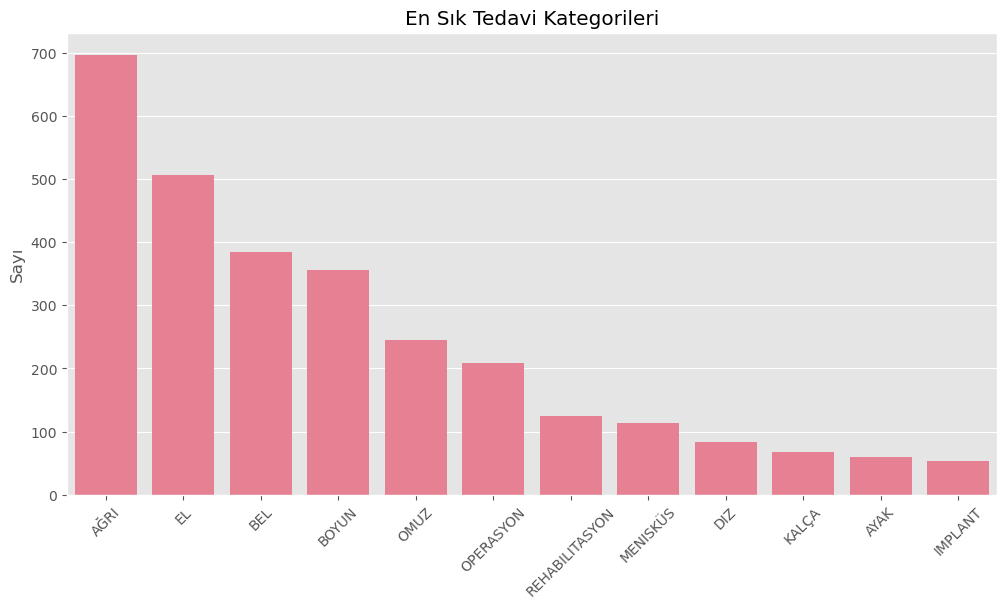

In [773]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x=[c.replace('TEDAVI_','').replace('BOLGE_','') for c in top_cats],
            y=[data[c].sum() for c in top_cats])
plt.xticks(rotation=45)
plt.ylabel('Sayı')
plt.title('En Sık Tedavi Kategorileri')
plt.show()


In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 76 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Yas                                     2235 non-null   int64 
 1   Cinsiyet                                2235 non-null   int32 
 2   TedaviSuresi                            2235 non-null   object
 3   UygulamaYerleri                         2014 non-null   object
 4   UygulamaSuresi                          2235 non-null   object
 5   KanGrubu_0 Rh+                          2235 non-null   int64 
 6   KanGrubu_0 Rh-                          2235 non-null   int64 
 7   KanGrubu_A Rh+                          2235 non-null   int64 
 8   KanGrubu_A Rh-                          2235 non-null   int64 
 9   KanGrubu_AB Rh+                         2235 non-null   int64 
 10  KanGrubu_AB Rh-                         2235 non-null   int64 
 11  KanG

## Application Location Processing)

In [775]:
# NaN'leri doldur
data['UygulamaYerleri'] = data['UygulamaYerleri'].fillna('BölgeBilinmiyor')

# Küçük harfe çevir, ekstra boşlukları temizle
data['UygulamaYerleri'] = data['UygulamaYerleri'].str.strip().str.lower()
data['UygulamaYerleri'] = data['UygulamaYerleri'].str.replace(r'\s+', ' ', regex=True)

# Opsiyonel: bazı yazım hatalarını düzelt
replace_dict = {
    'sol omuz bölgesi,sol el bilek bölgesi':'sol omuz+el bilek',
    'sağ omuz bölgesi,sağ el bilek bölgesi':'sağ omuz+el bilek',
    'sağ kalça bölgesi,sol kalça bölgesi':'sağ+sol kalça'
}
data['UygulamaYerleri'] = data['UygulamaYerleri'].replace(replace_dict)

In [776]:
# En sık 8 bölgeyi seç
top_8 = ['bel', 'boyun', 'diz', 'omuz', 'sırt', 'kalça', 'el bilek', 'ayak bilek']

for region in top_8:
    data[f'Bolge_{region.replace(" ","_")}'] = data['UygulamaYerleri'].str.contains(region, case=False).astype(int)


In [777]:
data['Bolge_Sol'] = data['UygulamaYerleri'].str.contains('sol', case=False).astype(int)
data['Bolge_Sag'] = data['UygulamaYerleri'].str.contains('sağ', case=False).astype(int)
data['Coklu_Bolge'] = data['UygulamaYerleri'].str.contains(r',|\+', regex=True).astype(int)  # , veya + ile çoklu bölge


In [778]:
# Kaç farklı bölge var
data['Bolge_Sayisi'] = data['UygulamaYerleri'].apply(lambda x: len(x.replace('+',',').split(',')) if x else 0)

# Üst / Alt ekstremite gruplama
data['Bolge_UstEkstremite'] = data[['Bolge_el_bilek','Bolge_omuz']].max(axis=1)

data['Bolge_AltEkstremite'] = data[['Bolge_diz','Bolge_ayak_bilek','Bolge_kalça']].max(axis=1)


In [779]:
data = data.drop('UygulamaYerleri', axis=1)

## Application Duration Processing

In [780]:

print(data["UygulamaSuresi"].unique())
print("******************************")
print(data["UygulamaSuresi"].value_counts(dropna=False))
print("******************************")
data["UygulamaSuresi"].nunique(dropna=False)

['20 Dakika' '5 Dakika' '30 Dakika' '15 Dakika' '10 Dakika' '45 Dakika'
 '25 Dakika' '3 Dakika' '40 Dakika' '8 Dakika']
******************************
UygulamaSuresi
20 Dakika    1535
5 Dakika      360
10 Dakika     221
15 Dakika      89
30 Dakika      11
45 Dakika      10
25 Dakika       5
40 Dakika       2
3 Dakika        1
8 Dakika        1
Name: count, dtype: int64
******************************


10

In [781]:
import re
import pandas as pd

# Güvenli dönüşüm
def extract_minutes(x):
    if pd.isna(x):
        return 0  # veya np.nan
    match = re.search(r'\d+', str(x))
    return int(match.group()) if match else 0

data['UygulamaSuresi_Dk'] = data['UygulamaSuresi'].apply(extract_minutes)


In [782]:
data = data.drop('UygulamaSuresi', axis=1)


In [783]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['UygulamaSuresi_Scaled'] = scaler.fit_transform(data[['UygulamaSuresi_Dk']])
data = data.drop('UygulamaSuresi_Dk', axis=1)


## Application Duration Processing

In [786]:
print(data["TedaviSuresi"].unique())
print("******************************")
print(data["TedaviSuresi"].value_counts(dropna=False))
print("******************************")
data["TedaviSuresi"].nunique(dropna=False)

['5 Seans' '15 Seans' '10 Seans' '18 Seans' '20 Seans' '2 Seans' '6 Seans'
 '4 Seans' '30 Seans' '11 Seans' '16 Seans' '21 Seans' '1 Seans' '8 Seans'
 '3 Seans' '7 Seans' '19 Seans' '29 Seans' '14 Seans' '17 Seans'
 '25 Seans' '22 Seans' '37 Seans']
******************************
TedaviSuresi
15 Seans    1670
10 Seans     175
20 Seans     113
2 Seans       45
17 Seans      36
4 Seans       35
16 Seans      27
21 Seans      20
18 Seans      20
5 Seans       17
30 Seans      12
19 Seans      10
11 Seans       9
3 Seans        7
8 Seans        6
7 Seans        5
29 Seans       5
25 Seans       5
22 Seans       5
37 Seans       5
1 Seans        3
6 Seans        3
14 Seans       2
Name: count, dtype: int64
******************************


23

In [790]:
# Sayısal değerleri çıkar ve float'a çevir
data['tedavi_suresi_numeric'] = data['TedaviSuresi'].str.extract('(\d+)').astype(float)

# Dönüşümü kontrol et
print("Dönüşüm sonrası istatistikler:")
print(data['tedavi_suresi_numeric'].describe())
print(f"\nEksik değer sayısı: {data['tedavi_suresi_numeric'].isnull().sum()}")

Dönüşüm sonrası istatistikler:
count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: tedavi_suresi_numeric, dtype: float64

Eksik değer sayısı: 0


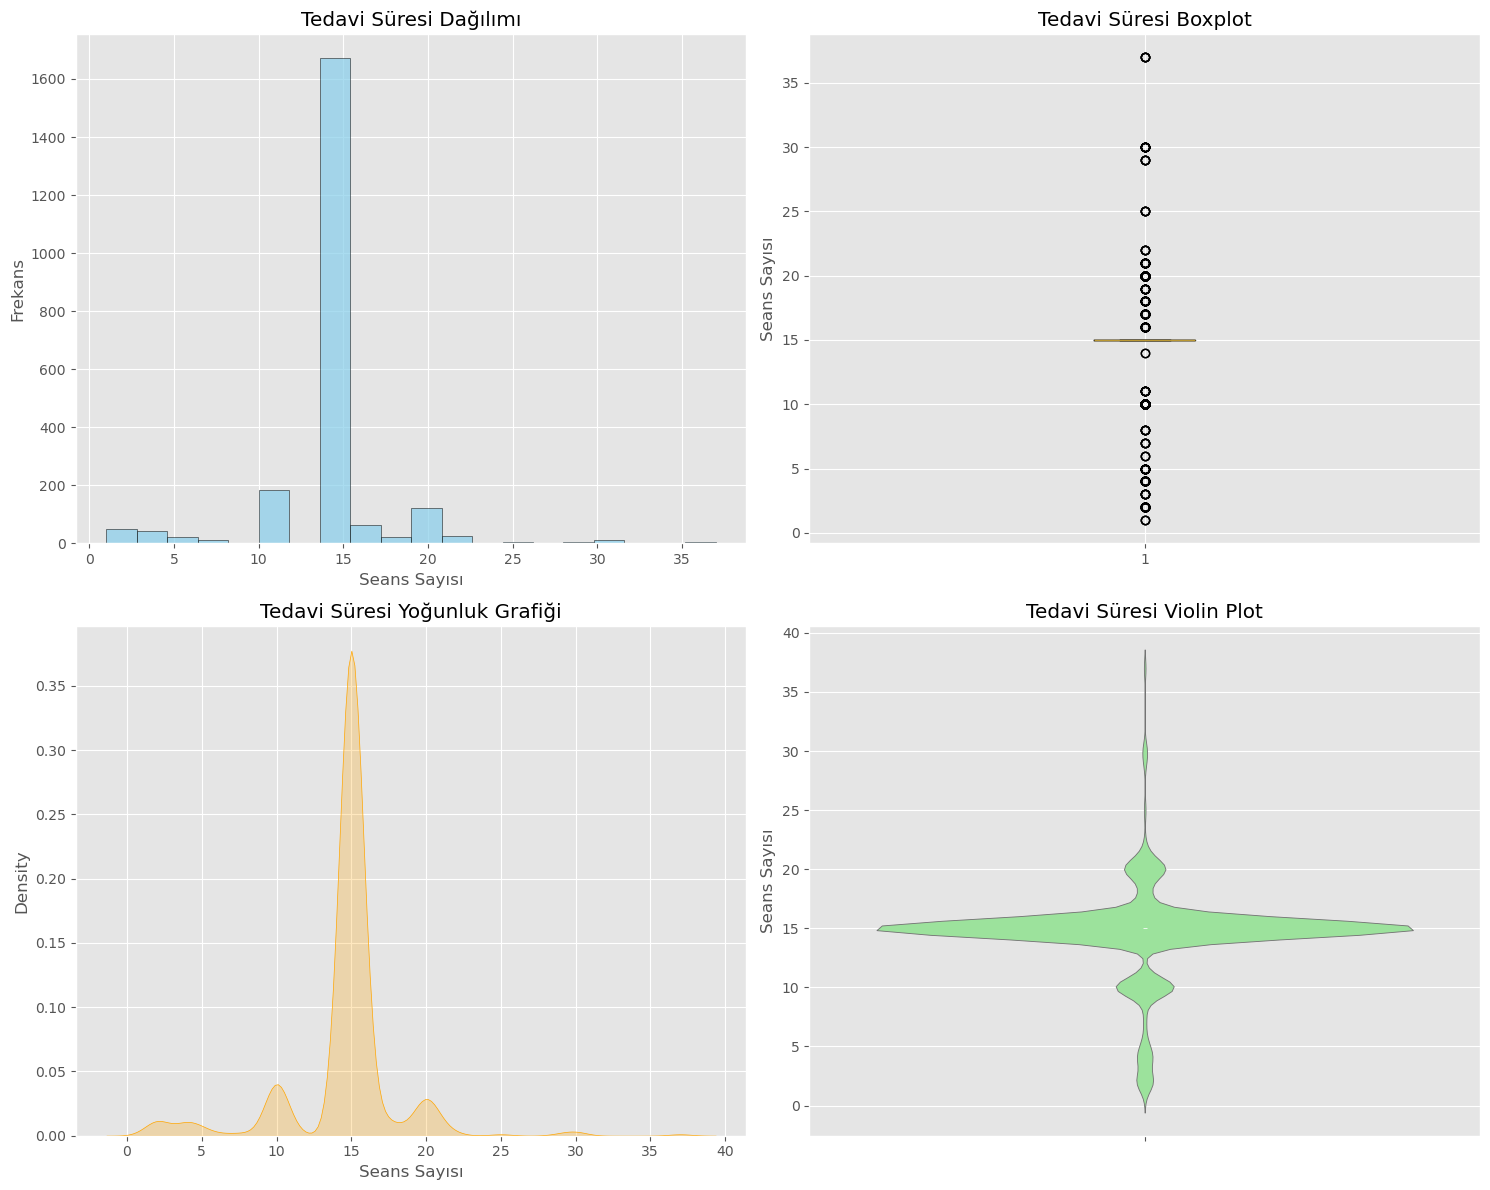

In [791]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dağılım grafikleri
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(data['tedavi_suresi_numeric'].dropna(), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Tedavi Süresi Dağılımı')
axes[0,0].set_xlabel('Seans Sayısı')
axes[0,0].set_ylabel('Frekans')

# Kutu grafiği (boxplot)
axes[0,1].boxplot(data['tedavi_suresi_numeric'].dropna())
axes[0,1].set_title('Tedavi Süresi Boxplot')
axes[0,1].set_ylabel('Seans Sayısı')

# Yoğunluk grafiği
sns.kdeplot(data['tedavi_suresi_numeric'].dropna(), ax=axes[1,0], fill=True, color='orange')
axes[1,0].set_title('Tedavi Süresi Yoğunluk Grafiği')
axes[1,0].set_xlabel('Seans Sayısı')

# Violin plot
sns.violinplot(y=data['tedavi_suresi_numeric'].dropna(), ax=axes[1,1], color='lightgreen')
axes[1,1].set_title('Tedavi Süresi Violin Plot')
axes[1,1].set_ylabel('Seans Sayısı')

plt.tight_layout()
plt.show()

In [814]:
print("TEDAVİ SÜRESİ İSTATİSTİKLERİ")
print("=" * 40)
print(f"Toplam gözlem: {len(data['tedavi_suresi_numeric'].dropna())}")
print(f"Ortalama: {data['tedavi_suresi_numeric'].mean():.2f} seans")
print(f"Medyan: {data['tedavi_suresi_numeric'].median()} seans")
print(f"Standart Sapma: {data['tedavi_suresi_numeric'].std():.2f}")
print(f"Minimum: {data['tedavi_suresi_numeric'].min()} seans")
print(f"Maksimum: {data['tedavi_suresi_numeric'].max()} seans")
print(f"Çeyreklikler:")
print(data['tedavi_suresi_numeric'].quantile([0.25, 0.5, 0.75]))

TEDAVİ SÜRESİ İSTATİSTİKLERİ
Toplam gözlem: 2235
Ortalama: 14.57 seans
Medyan: 15.0 seans
Standart Sapma: 3.73
Minimum: 1.0 seans
Maksimum: 37.0 seans
Çeyreklikler:
0.25    15.0
0.50    15.0
0.75    15.0
Name: tedavi_suresi_numeric, dtype: float64


In [797]:
data = data.drop('TedaviSuresi', axis=1)


In [798]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 89 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Yas                                     2235 non-null   int64  
 1   Cinsiyet                                2235 non-null   int32  
 2   KanGrubu_0 Rh+                          2235 non-null   int64  
 3   KanGrubu_0 Rh-                          2235 non-null   int64  
 4   KanGrubu_A Rh+                          2235 non-null   int64  
 5   KanGrubu_A Rh-                          2235 non-null   int64  
 6   KanGrubu_AB Rh+                         2235 non-null   int64  
 7   KanGrubu_AB Rh-                         2235 non-null   int64  
 8   KanGrubu_B Rh+                          2235 non-null   int64  
 9   KanGrubu_B Rh-                          2235 non-null   int64  
 10  Uyruk_Diğer                             2235 non-null   int3

## Correlation MAtrix Analysis

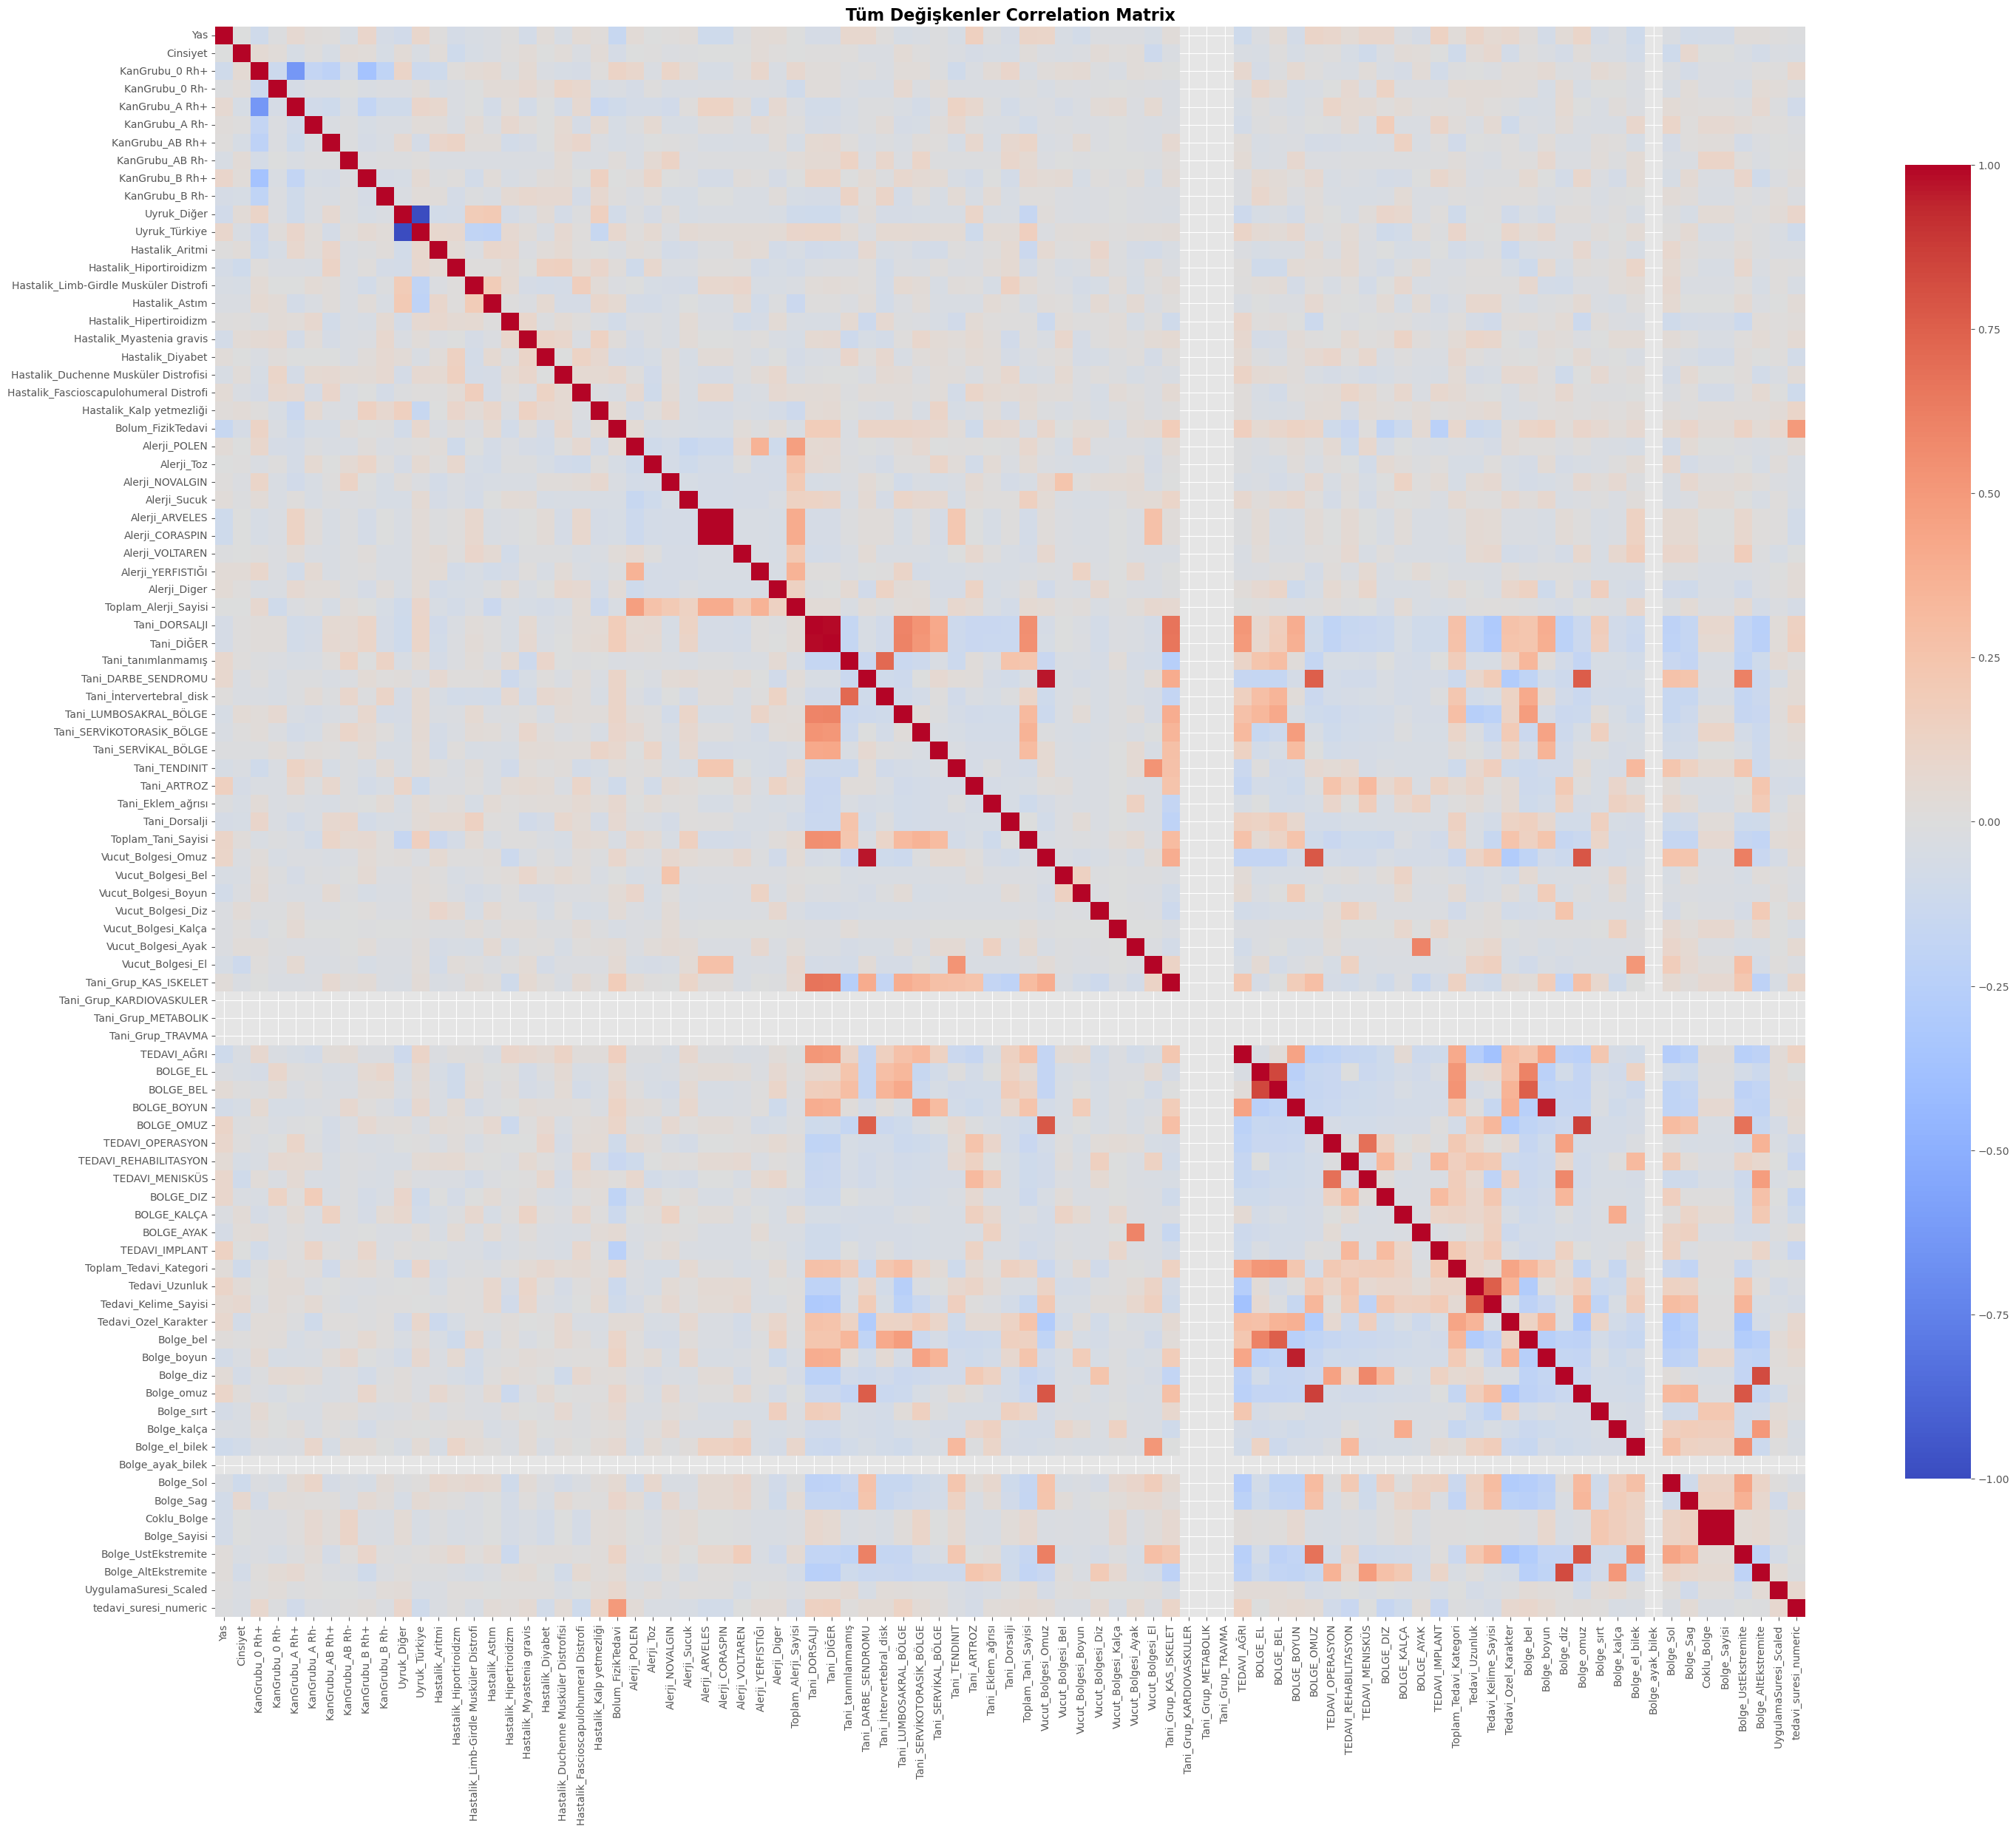

In [799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix hesapla
correlation_matrix = data.corr()

# Heatmap oluştur
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0,
            annot=False,  # Çok büyük olduğu için annotation'ları kapatıyoruz
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Tüm Değişkenler Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [815]:
# Target değişkeni ile korelasyonları göster
target_corr = correlation_matrix['tedavi_suresi_numeric'].sort_values(ascending=False)

print("TEDAVİ SÜRESİ İLE EN YÜKSEK KORELASYONLAR")
print("=" * 60)
print(target_corr.head(15))
print("\n" + "=" * 60)
print(" TEDAVİ SÜRESİ İLE EN DÜŞÜK KORELASYONLAR")
print("=" * 60)
print(target_corr.tail(15))

TEDAVİ SÜRESİ İLE EN YÜKSEK KORELASYONLAR
tedavi_suresi_numeric       1.000000
Bolum_FizikTedavi           0.498134
Tani_DİĞER                  0.154096
Tani_DORSALJI               0.141014
TEDAVI_AĞRI                 0.133310
Tani_LUMBOSAKRAL_BÖLGE      0.127722
Hastalik_Kalp yetmezliği    0.104217
Tani_Grup_KAS_ISKELET       0.103669
Uyruk_Diğer                 0.097729
Bolge_bel                   0.088794
KanGrubu_0 Rh+              0.083291
UygulamaSuresi_Scaled       0.077701
Tedavi_Ozel_Karakter        0.073315
Bolge_boyun                 0.057560
BOLGE_BOYUN                 0.055070
Name: tedavi_suresi_numeric, dtype: float64

 TEDAVİ SÜRESİ İLE EN DÜŞÜK KORELASYONLAR
Hastalik_Diyabet                         -0.080451
Alerji_ARVELES                           -0.085902
Alerji_CORASPIN                          -0.085902
KanGrubu_A Rh+                           -0.085959
TEDAVI_OPERASYON                         -0.090867
Uyruk_Türkiye                            -0.097729
BOLGE_KALÇ

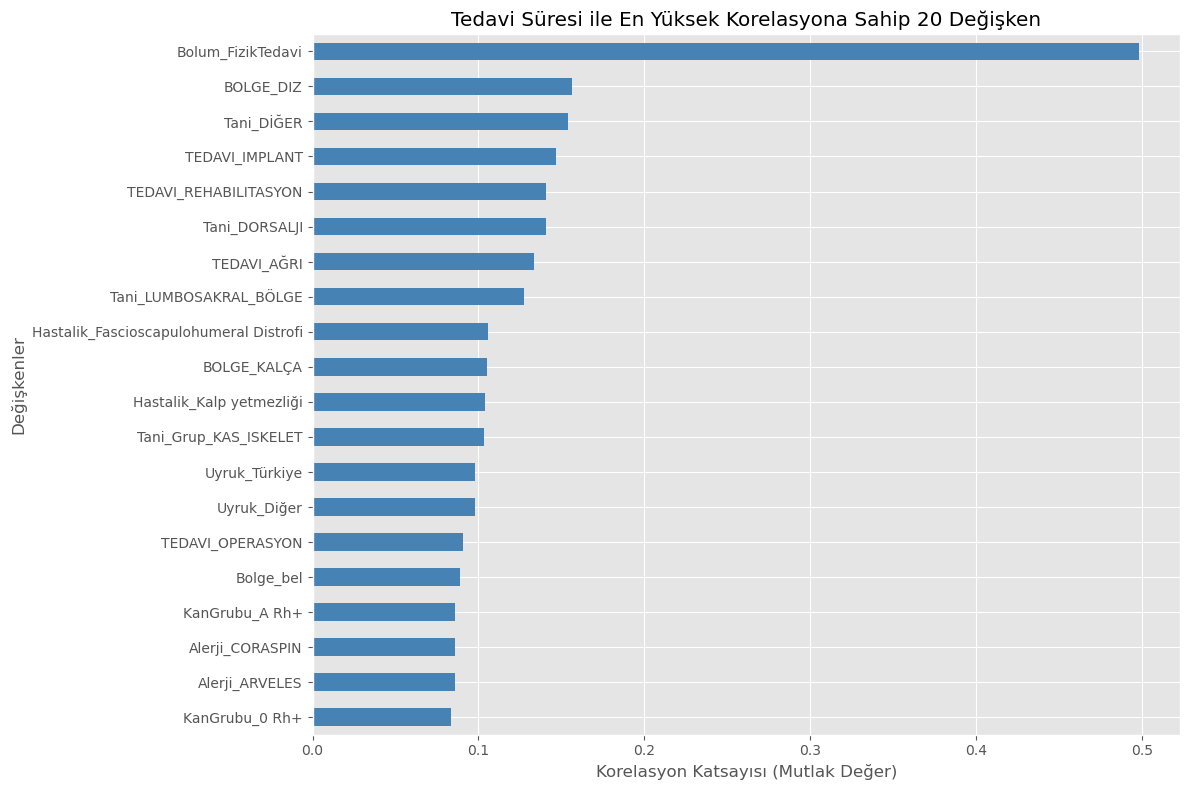

In [801]:
# Target ile en yüksek korelasyona sahip 20 değişken
top_20_corr = target_corr.abs().sort_values(ascending=False).head(21)
top_20_corr = top_20_corr[1:]  # Kendisiyle olan 1.0 korelasyonu çıkar

plt.figure(figsize=(12, 8))
top_20_corr.plot(kind='barh', color='steelblue')
plt.title('Tedavi Süresi ile En Yüksek Korelasyona Sahip 20 Değişken')
plt.xlabel('Korelasyon Katsayısı (Mutlak Değer)')
plt.ylabel('Değişkenler')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [803]:
# NaN değer içerenler - kesinlikle drop
drop_columns_nan = [
    'Tani_Grup_KARDIOVASKULER',
    'Tani_Grup_METABOLIK', 
    'Tani_Grup_TRAVMA',
    'Bolge_ayak_bilek'
]

# Çok düşük korelasyon ve muhtemelen sabit değerler
drop_columns_low = [
    'Hastalik_Fascioscapulohumeral Distrofi',  # Çok nadir görülüyor olabilir
    'Alerji_ARVELES',                         # Çok düşük korelasyon
    'Alerji_CORASPIN'                         # Çok düşük korelasyon
]

In [806]:
# Aynı bilgiyi içeren değişkenlerden birini drop et
drop_columns = [
    'BOLGE_BEL',           # 'Bolge_bel' ile aynı
    'BOLGE_BOYUN',         # 'Bolge_boyun' ile aynı  
    'BOLGE_DIZ',           # Muhtemelen 'Bolge_diz' ile aynı
    'BOLGE_EL',            # Muhtemelen 'Bolge_el' ile aynı
    'BOLGE_OMUZ',          # Muhtemelen 'Bolge_omuz' ile aynı
    'BOLGE_KALÇA',         # Muhtemelen 'Bolge_kalça' ile aynı
    'BOLGE_AYAK'           # Muhtemelen 'Bolge_ayak' ile aynı
]

data = data.drop(columns=drop_columns, errors='ignore')

In [808]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Yas                                     2235 non-null   int64  
 1   Cinsiyet                                2235 non-null   int32  
 2   KanGrubu_0 Rh+                          2235 non-null   int64  
 3   KanGrubu_0 Rh-                          2235 non-null   int64  
 4   KanGrubu_A Rh+                          2235 non-null   int64  
 5   KanGrubu_A Rh-                          2235 non-null   int64  
 6   KanGrubu_AB Rh+                         2235 non-null   int64  
 7   KanGrubu_AB Rh-                         2235 non-null   int64  
 8   KanGrubu_B Rh+                          2235 non-null   int64  
 9   KanGrubu_B Rh-                          2235 non-null   int64  
 10  Uyruk_Diğer                             2235 non-null   int3

## Modeling Pipeline

In [809]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ======================
# 1) X / y ayrımı
# ======================
y = data['tedavi_suresi_numeric']
X = data.drop(columns=['tedavi_suresi_numeric'])

# ======================
# 2) Sürekli sayısal vs binary ayrımı
# ======================
num_cols_all = X.select_dtypes(include=[np.number]).columns.tolist()
binary_like = [c for c in num_cols_all if X[c].nunique() <= 2]
cont_nums   = [c for c in num_cols_all if c not in binary_like]

print("Sürekli sayısal:", cont_nums)
print("Binary:", binary_like[:10], "... (toplam", len(binary_like), ")")

# ======================
# 3) ColumnTransformer
# ======================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_nums)   # sadece sürekli sayısal scale edilecek
    ],
    remainder='passthrough'  # binary sütunlar aynen kalır
)

# ======================
# 4) Train-Test split
# ======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================
# 5) Pipeline + Model
# ======================
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Eğit
model.fit(X_train, y_train)

# ======================
# 6) Tahmin + metrikler
# ======================
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test R² :", r2)
print("Test MSE:", mse)


Sürekli sayısal: ['Yas', 'Toplam_Alerji_Sayisi', 'Toplam_Tani_Sayisi', 'Toplam_Tedavi_Kategori', 'Tedavi_Uzunluk', 'Tedavi_Kelime_Sayisi', 'UygulamaSuresi_Scaled']
Binary: ['Cinsiyet', 'KanGrubu_0 Rh+', 'KanGrubu_0 Rh-', 'KanGrubu_A Rh+', 'KanGrubu_A Rh-', 'KanGrubu_AB Rh+', 'KanGrubu_AB Rh-', 'KanGrubu_B Rh+', 'KanGrubu_B Rh-', 'Uyruk_Diğer'] ... (toplam 74 )
Test R² : 0.9390126958381431
Test MSE: 0.9348114593846016
